# Housing Statistics Report
### Housing Agency, Boston MA
Prepared by: Ayush Kothule
<br/>Date: August, 2021

Based on the data from U.S. Census Service, this report is prepared to provide the following insights.
* Is there a significant difference in the median value of houses bounded by the Charles river or not?
* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

In [25]:
# import required packages
import pandas as pd
import seaborn as sns
import scipy.stats

Load the housing data from the U.S. Census Service

In [26]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Data Description
The dataset has the following variables


| Variable | Description | 
| ----------- | ----------- | 
| CRIM | per capita crime rate by town| 
| ZN | proportion of residential land zoned for lots over 25,000 sq.ft.| 
| INDUS | proportion of non-retail business acres per town.| 
| CHAS | Charles River dummy variable (1 if tract bounds river; 0 otherwise)| 
| NOX | nitric oxides concentration (parts per 10 million)| 
| RM | average number of rooms per dwelling| 
| AGE | proportion of owner-occupied units built prior to 1940| 
| DIS | weighted distances to five Boston employment centres| 
| RAD | index of accessibility to radial highways | 
| TAX | full-value property-tax rate per \$10,000 | 
| PTRATIO | pupil-teacher ratio by town | 
| LSTAT | % lower status of the population | 
| MEDV | Median value of owner-occupied homes in $1000's |
    


In [27]:
# preview the dataset
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [28]:
# show basic statistics
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Question #1: Is there a significant difference in the median value of houses bounded by the Charles river or not?

### Create a boxplot for median value of owner-occupied homes

Text(0.5, 1.0, 'Median Value of Owner-Occupied Homes')

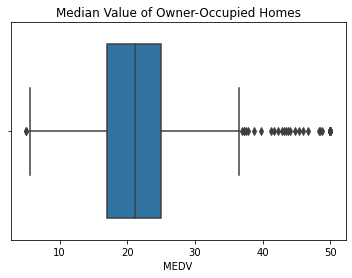

In [42]:
sns.boxplot(x='MEDV', data=boston_df).set_title('Median Value of Owner-Occupied Homes')

>ℹ️&nbsp;&nbsp;The median median value of owner-occupied homes is around $21,000.

### Create a histogram for the Charles river variable

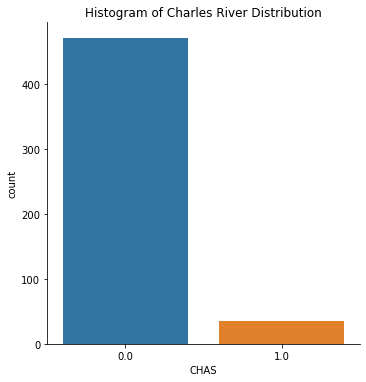

In [46]:
sns.catplot(x='CHAS', kind='count', data=boston_df).set(title='Histogram of Charles River Distribution')

>ℹ️&nbsp;&nbsp; There are many more houses that do not border the Charles River than houses that do border the Charles River.

### Create a boxplot for the MEDV variable vs the AGE variable.
Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older.

Text(0.5, 1.0, 'Median Value of House Age Group')

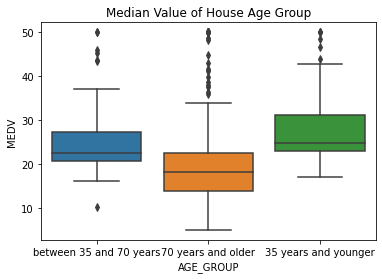

In [47]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df).set_title('Median Value of House Age Group')

>ℹ️&nbsp;&nbsp;The older houses are cheaper compared to the younger houses.

### Create a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

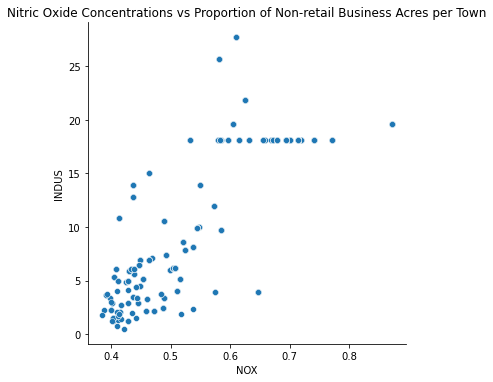

In [49]:
sns.relplot(x='NOX', y='INDUS', data=boston_df).set(title='Nitric Oxide Concentrations vs Proportion of Non-retail Business Acres per Town')

>ℹ️&nbsp;&nbsp;The lower proportion of non-retail business acres per town had low nitric oxide concentrations.

### Create a histogram for the pupil to teacher ratio variable

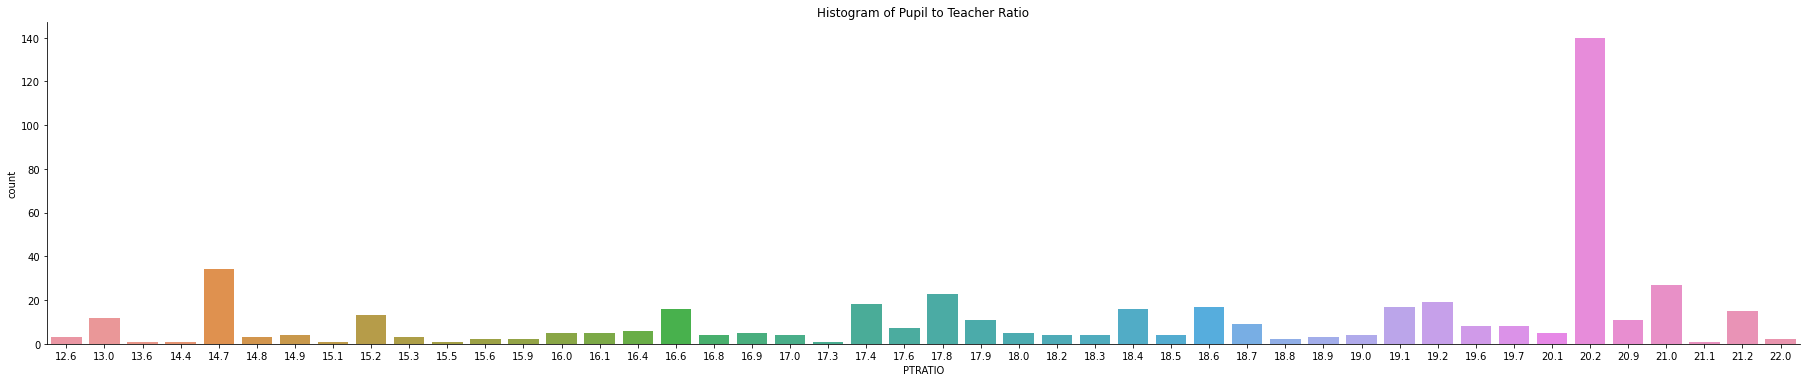

In [50]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df, aspect=5).set(title='Histogram of Pupil to Teacher Ratio')

>ℹ️&nbsp;&nbsp;A majority of the pupil to teacher ratio is 20.2.

### Question #1: Is there a significant difference in the median value of houses bounded by the Charles river or not?

Text(0.5, 1.0, 'Median Value of Houses Bounded by the Charles River')

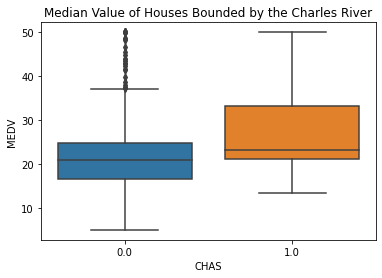

In [51]:
sns.boxplot(x='CHAS', y='MEDV', data=boston_df).set_title('Median Value of Houses Bounded by the Charles River')

$H_0:$ The median value of houses bounded by the Charles River and not bounded by the river is the same.

$H_1:$ There is a difference in median value of houses bounded by Charles River and not bounded by the river.

Conduct a T-test

In [34]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

>ℹ️&nbsp;&nbsp;Since the p-value is less than 0.05, we can reject the null hypothesis as there is sufficient evidence that the median value of houses bounded by the Charles River differs from the median value of houses not bounded by the river.

### Question #2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

Text(0.5, 1.0, 'Median Value of Houses Based on its Age Group')

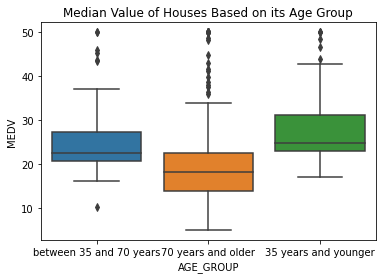

In [52]:
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df).set_title('Median Value of Houses Based on its Age Group')

$H_0:$ There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940.

$H_1:$ There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940.

Test for equality of variance

In [36]:
scipy.stats.f_oneway(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'], 
                    boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                    boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

>ℹ️&nbsp;&nbsp;Since the p-value is less than 0.05, we can reject the null hypothesis as there is sufficient evidence that at least one of the age group's median values of houses is different.

### Question #3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

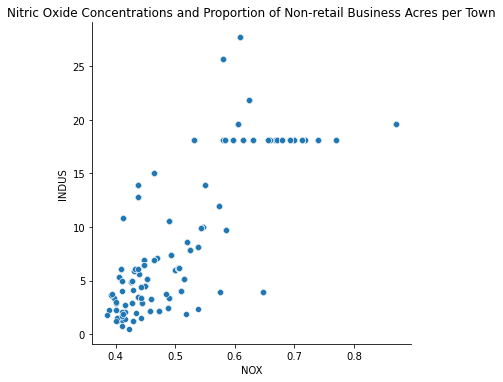

In [53]:
sns.relplot(x='NOX', y='INDUS', data=boston_df).set(title='Nitric Oxide Concentrations and Proportion of Non-retail Business Acres per Town')

$H_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

$H_1:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Conduct a pearson correlation test

In [37]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

>ℹ️&nbsp;&nbsp;Since the p-value is less than 0.05, we can reject the null hypothesis as there is sufficient evidence that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### Question #4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

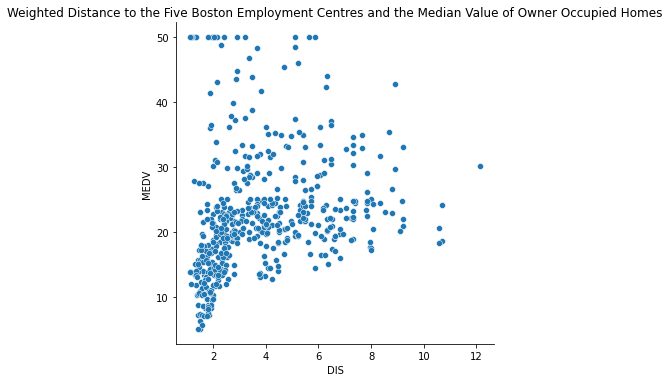

In [54]:
sns.relplot(x='DIS', y='MEDV', data=boston_df).set(title='Weighted Distance to the Five Boston Employment Centres and the Median Value of Owner Occupied Homes')

$H_0:$ There is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.

$H_1:$ There is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.

Conduct a pearson correlation test

In [41]:
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

(0.2499287340859039, 1.2066117273368017e-08)

>ℹ️&nbsp;&nbsp;Since the p-value is less than 0.05, we can reject the null hypothesis as there is sufficient evidence that there is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.